In [1]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
from torch.optim import *

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

# EfficientNet

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/architecture")

In [3]:
data = (
    (
        ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(), size=128)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

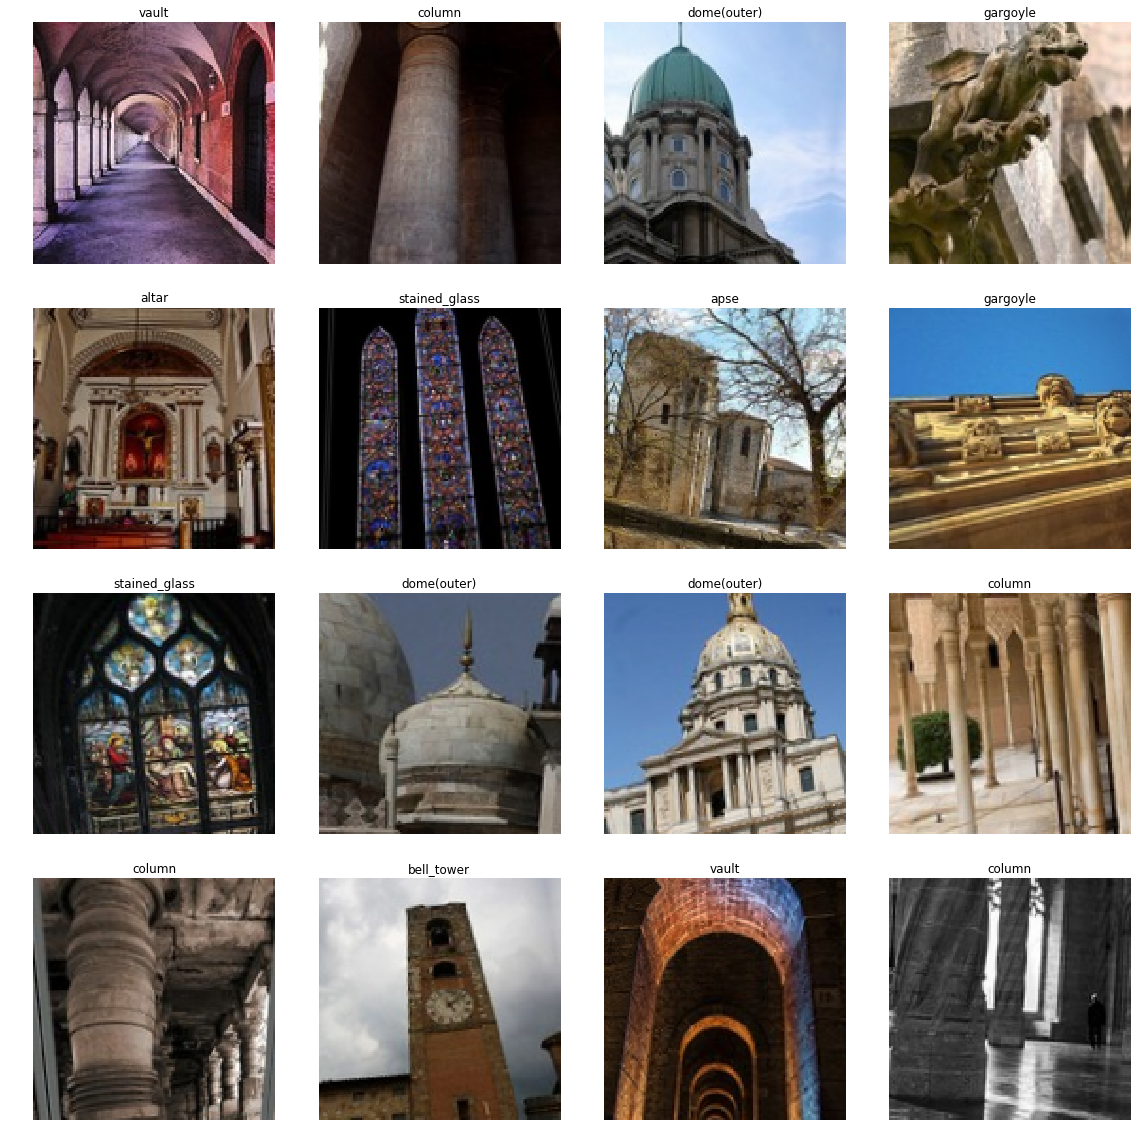

In [4]:
data.show_batch(4)

In [5]:
data.c

10

In [6]:
learn = None
gc.collect()

31390

In [7]:
from efficientnet_pytorch import EfficientNet

arch = EfficientNet.from_pretrained("efficientnet-b0", advprop=True)
arch._fc = nn.Linear(1280, data.c)
loss_func = LabelSmoothingCrossEntropy()

Loaded pretrained weights for efficientnet-b0


In [8]:
learn = Learner(data, arch, loss_func=loss_func, metrics=accuracy).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


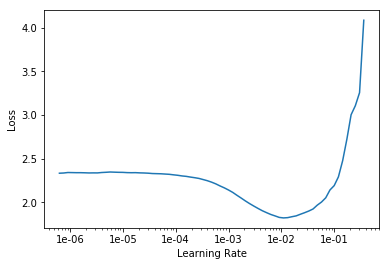

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-2, wd=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.050670,113.814232,0.074744,00:55
1,0.996179,12.121920,0.263801,00:19
2,0.866530,1.874245,0.696141,00:19
3,0.721369,0.955110,0.853444,00:19
4,0.633828,0.629101,0.948705,00:20


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


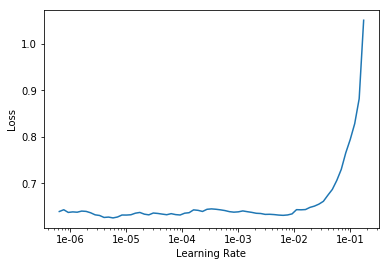

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-2, wd=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.709477,2.181552,0.557401,00:19
1,0.827808,2.656326,0.577919,00:20
2,0.742709,1.143919,0.784074,00:20
3,0.669014,0.729735,0.915486,00:20
4,0.614598,0.618890,0.949682,00:20


In [18]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

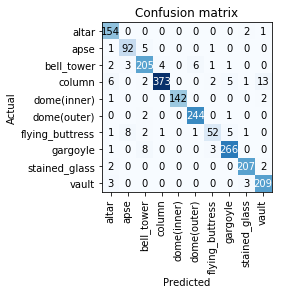

In [19]:
interp.plot_confusion_matrix()

# Resnet + mixup

In [11]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/architecture")

In [12]:
learn = None
gc.collect()

22371

In [13]:
learn = (
    cnn_learner(
        data,
        models.resnet34,
        metrics=[accuracy, error_rate],
        opt_func=AdamW,
        callback_fns=ShowGraph,
        pretrained=False,
    )
    .mixup()
    .to_fp16()
)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


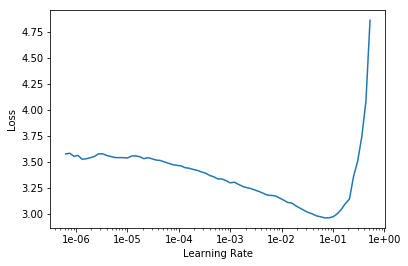

In [14]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.201759,1.831841,0.367855,0.632145,00:07
1,2.107897,1.607991,0.422570,0.577430,00:07
2,2.079093,1.845447,0.360528,0.639472,00:07
3,1.990433,2.039265,0.356619,0.643381,00:08
4,2.369709,2.334978,0.353200,0.646800,00:08
5,3.564792,2.357779,0.255007,0.744993,00:08
6,2.256035,12.345775,0.520274,0.479726,00:07
7,2.294693,nan,0.441622,0.558378,00:07


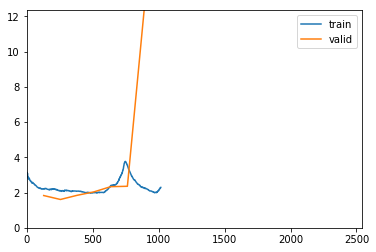

KeyboardInterrupt: 

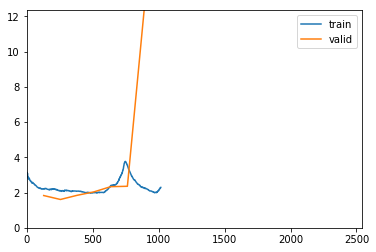

In [15]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-5, 1e-1), wd=10e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


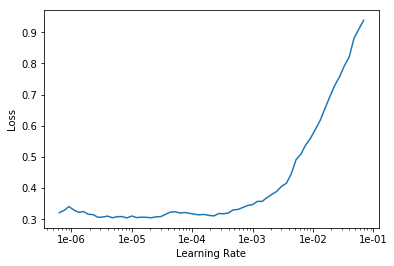

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

# xresnet

In [16]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/architecture")

In [75]:
learn = None
gc.collect()

53444

In [76]:
learn = Learner(
    data,
    models.xresnet34(),
    metrics=[accuracy, error_rate],
    opt_func=AdamW,
    callback_fns=[ShowGraph, OverSamplingCallback],
).to_fp16()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


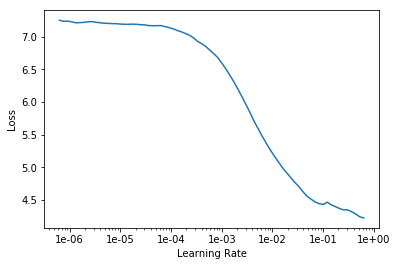

In [77]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.316207,1.577560,0.541280,0.458720,00:13
1,0.928521,0.993608,0.663898,0.336102,00:13
2,0.722940,0.770790,0.748412,0.251588,00:13
3,0.579382,0.659816,0.780655,0.219345,00:13
4,0.499202,0.699876,0.768930,0.231070,00:14
5,0.392204,0.600693,0.791402,0.208598,00:14
6,0.338227,0.487525,0.837811,0.162189,00:14
7,0.261530,0.409125,0.867611,0.132389,00:14
8,0.212943,0.409761,0.864191,0.135808,00:13
9,0.179855,0.474910,0.849536,0.150464,00:13


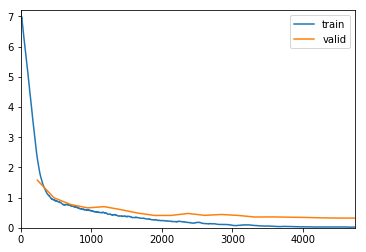

In [78]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3), wd=10e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.034317,0.370996,0.898876,0.101124,00:13
1,0.113813,0.640606,0.831461,0.168539,00:13
2,0.157208,0.517290,0.851490,0.148510,00:13
3,0.106871,0.396342,0.892037,0.107963,00:14
4,0.084374,0.405782,0.884709,0.115291,00:13
5,0.069276,0.362625,0.891549,0.108451,00:13
6,0.047095,0.352559,0.901319,0.098681,00:13
7,0.029978,0.325447,0.909135,0.090865,00:13
8,0.018873,0.309808,0.914021,0.085979,00:13
9,0.022972,0.304121,0.910601,0.089399,00:14


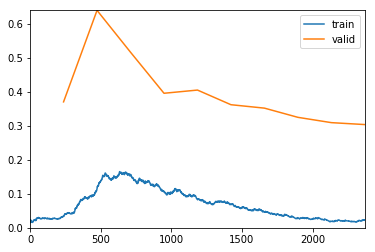

In [79]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3), wd=10e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.027233,0.328972,0.905716,0.094284,00:13
1,0.089122,0.476274,0.876405,0.123596,00:13
2,0.123653,0.507139,0.864680,0.135320,00:13
3,0.090781,0.389100,0.885198,0.114802,00:13
4,0.066204,0.373766,0.891060,0.108940,00:13
5,0.045400,0.362417,0.900342,0.099658,00:13
6,0.027335,0.356628,0.907670,0.092330,00:13
7,0.021083,0.348976,0.911089,0.088911,00:14
8,0.014681,0.339789,0.911089,0.088911,00:13
9,0.012112,0.341270,0.910601,0.089399,00:14


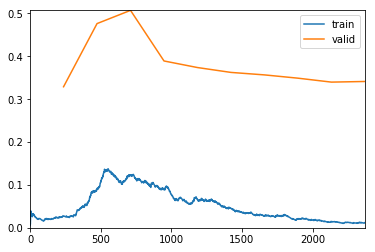

In [80]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3), wd=1e-2)

# xresnet +mixup

In [26]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/architecture")

In [27]:
learn = None
gc.collect()

24346

In [28]:
learn = (
    Learner(
        data,
        models.xresnet34(),
        metrics=[accuracy, error_rate],
        opt_func=AdamW,
        callback_fns=ShowGraph,
    )
    .mixup()
    .to_fp16()
)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


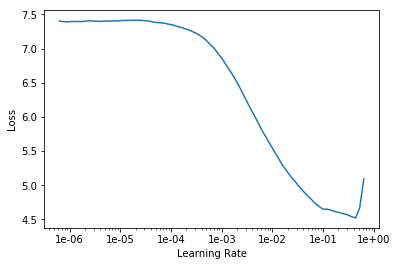

In [29]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,4.635287,3.154490,0.375672,0.624328,00:07
1,1.968840,1.194937,0.601368,0.398632,00:07
2,1.430099,0.895218,0.710796,0.289204,00:07
3,1.295919,0.936395,0.676600,0.323400,00:07
4,1.207292,0.788507,0.725452,0.274548,00:07
5,1.160635,0.760574,0.751343,0.248657,00:07
6,1.101711,0.876365,0.706400,0.293600,00:08
7,1.035094,0.650722,0.797264,0.202736,00:08
8,0.994062,0.604247,0.801661,0.198339,00:08
9,0.962032,0.545276,0.832438,0.167562,00:08


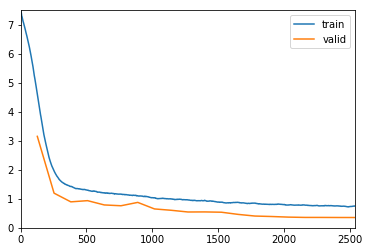

In [30]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3), wd=10e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


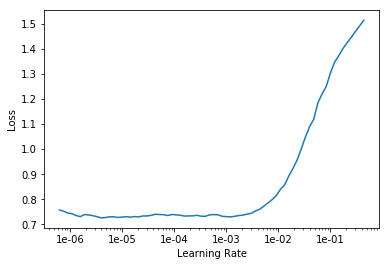

In [31]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.748968,0.376981,0.886663,0.113337,00:07
1,0.816902,0.504560,0.846605,0.153395,00:08
2,0.893395,0.530391,0.836346,0.163654,00:07
3,0.864704,0.461217,0.859795,0.140205,00:08
4,0.822456,0.438194,0.871519,0.128481,00:07
5,0.784707,0.384911,0.881778,0.118222,00:08
6,0.757524,0.349814,0.889595,0.110405,00:07
7,0.731925,0.346051,0.894480,0.105520,00:07
8,0.698866,0.321990,0.908647,0.091353,00:08
9,0.705026,0.323067,0.905227,0.094773,00:07


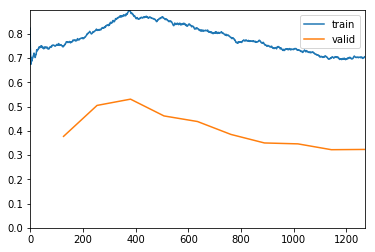

In [33]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3), wd=10e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.688102,0.346676,0.895945,0.104055,00:07
1,0.754226,0.429959,0.875427,0.124573,00:07
2,0.787205,0.546756,0.823644,0.176356,00:08
3,0.781835,0.379787,0.884221,0.115779,00:08
4,0.762723,0.466762,0.861260,0.138740,00:08
5,0.748732,0.425836,0.871519,0.128481,00:08
6,0.713248,0.328760,0.902785,0.097215,00:08
7,0.679700,0.306701,0.910601,0.089399,00:07
8,0.666588,0.303449,0.912066,0.087934,00:07
9,0.658713,0.302364,0.914021,0.085979,00:08


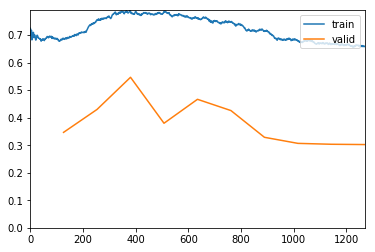

In [34]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3), wd=10e-2)

# xresnet50 +mixup

(array([ 656.,  402.,  844., 1522.,  508.,  945.,  342., 1253.,  831.,  885.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

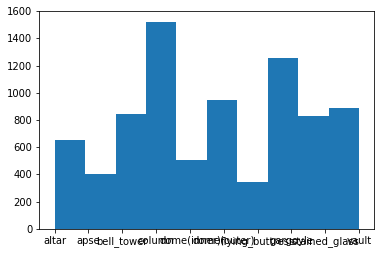

In [52]:
class_sam = [str(x) for x in data.train_ds.y]
plt.hist(class_sam)

In [53]:
from fastai.callbacks import OverSamplingCallback

In [58]:
learn = None
gc.collect()

12566

In [64]:
learn = (
    Learner(
        data,
        models.xresnet34(),
        metrics=[accuracy, error_rate],
        opt_func=AdamW,
        callback_fns=[ShowGraph, OverSamplingCallback],
    )
    .mixup()
    .to_fp16()
)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


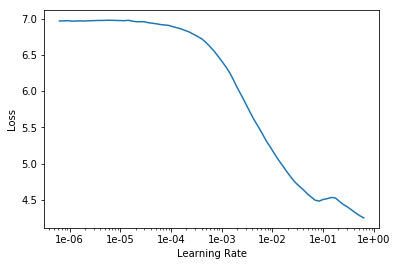

In [65]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.566694,1.561982,0.541280,0.458720,00:13
1,1.410008,0.950484,0.686859,0.313141,00:14
2,1.242230,1.005562,0.654617,0.345383,00:14
3,1.159660,0.947048,0.676111,0.323889,00:14
4,1.063056,0.884862,0.703957,0.296043,00:14
5,1.015937,0.723100,0.756229,0.243771,00:13
6,0.946861,0.577433,0.814851,0.185149,00:14
7,0.906307,0.534888,0.828530,0.171470,00:13
8,0.868195,0.486698,0.844651,0.155349,00:14
9,0.835881,0.451970,0.862237,0.137763,00:14


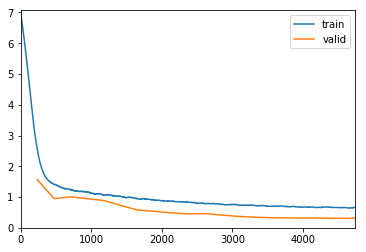

In [66]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3), wd=10e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


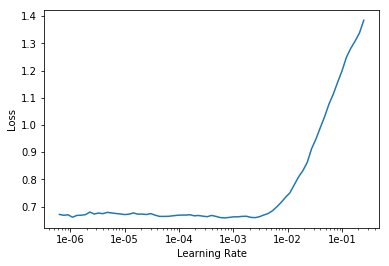

In [67]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.673575,0.348203,0.903273,0.096727,00:14
1,0.722875,0.487512,0.853444,0.146556,00:14
2,0.757050,0.380345,0.881290,0.118710,00:14
3,0.727587,0.403665,0.879336,0.120664,00:14
4,0.712602,0.401918,0.879336,0.120664,00:14
5,0.694964,0.328966,0.901319,0.098681,00:13
6,0.668631,0.322849,0.906693,0.093307,00:14
7,0.642511,0.295036,0.918417,0.081583,00:13
8,0.639019,0.290955,0.918906,0.081094,00:13
9,0.629073,0.289709,0.919883,0.080117,00:14


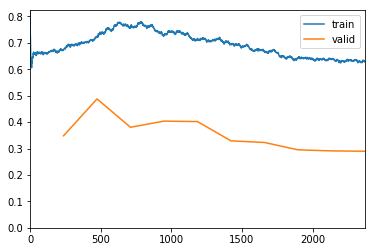

In [68]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3), wd=10e-2)

In [72]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

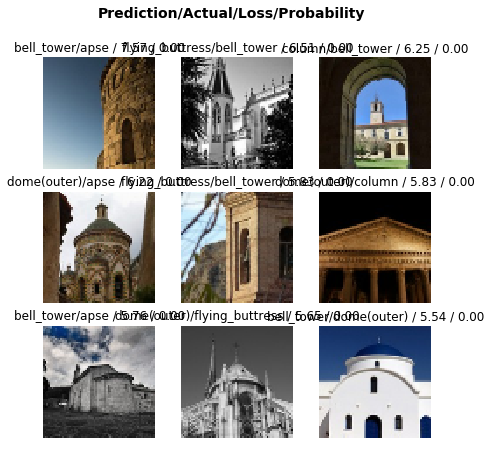

In [73]:
interp.plot_top_losses(9, figsize=(7, 7))

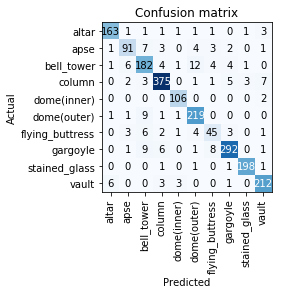

In [74]:
interp.plot_confusion_matrix()